In [2]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline

# Data import 

In [3]:
df = pd.read_csv('insurance2.csv')

In [4]:
df

,age,sex,bmi,children,smoker,region,charges,insuranceclaim
0,19,0,27.900,0,1,3,16884.92400,1
1,18,1,33.770,1,0,2,1725.55230,1
2,28,1,33.000,3,0,2,4449.46200,0
3,33,1,22.705,0,0,1,21984.47061,0
4,32,1,28.880,0,0,1,3866.85520,1
...,...,...,...,...,...,...,...,...
1333,50,1,30.970,3,0,1,10600.54830,0
1334,18,0,31.920,0,0,0,2205.98080,1
1335,18,0,36.850,0,0,2,1629.83350,1
1336,21,0,25.800,0,0,3,2007.94500,0


In [5]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges',
       'insuranceclaim'],
      dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             1338 non-null   int64  
 1   sex             1338 non-null   int64  
 2   bmi             1338 non-null   float64
 3   children        1338 non-null   int64  
 4   smoker          1338 non-null   int64  
 5   region          1338 non-null   int64  
 6   charges         1338 non-null   float64
 7   insuranceclaim  1338 non-null   int64  
dtypes: float64(2), int64(6)
memory usage: 83.8 KB


In [7]:
df.isnull().sum()

age               0
sex               0
bmi               0
children          0
smoker            0
region            0
charges           0
insuranceclaim    0
dtype: int64

Text(0.5, 1.0, 'Countplot for Age')

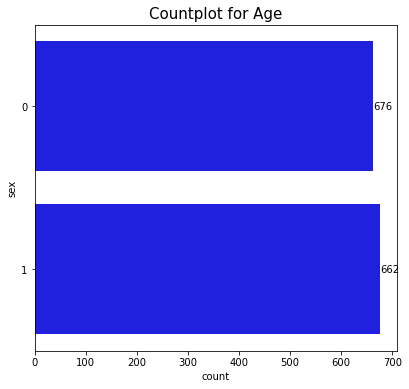

In [8]:
fig1 , ax1 = plt.subplots(figsize= (6.5,6))
ax1 = sns.countplot(y = df.sex, color = 'b')
ax1.bar_label(container = ax1.containers[0], labels = df['sex'].value_counts())
ax1.set_title('Countplot for Age',fontsize = 15 )

In [9]:
df.head()

,age,sex,bmi,children,smoker,region,charges,insuranceclaim
0,19,0,27.900,0,1,3,16884.92400,1
1,18,1,33.770,1,0,2,1725.55230,1
2,28,1,33.000,3,0,2,4449.46200,0
3,33,1,22.705,0,0,1,21984.47061,0
4,32,1,28.880,0,0,1,3866.85520,1


In [10]:
df.describe()

,age,sex,bmi,children,smoker,region,charges,insuranceclaim
count,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,0.505232,30.663397,1.094918,0.204783,1.515695,13270.422265,0.585202
std,14.049960,0.500160,6.098187,1.205493,0.403694,1.104885,12110.011237,0.492871
min,18.000000,0.000000,15.960000,0.000000,0.000000,0.000000,1121.873900,0.000000
25%,27.000000,0.000000,26.296250,0.000000,0.000000,1.000000,4740.287150,0.000000
50%,39.000000,1.000000,30.400000,1.000000,0.000000,2.000000,9382.033000,1.000000
75%,51.000000,1.000000,34.693750,2.000000,0.000000,2.000000,16639.912515,1.000000
max,64.000000,1.000000,53.130000,5.000000,1.000000,3.000000,63770.428010,1.000000


<AxesSubplot:>

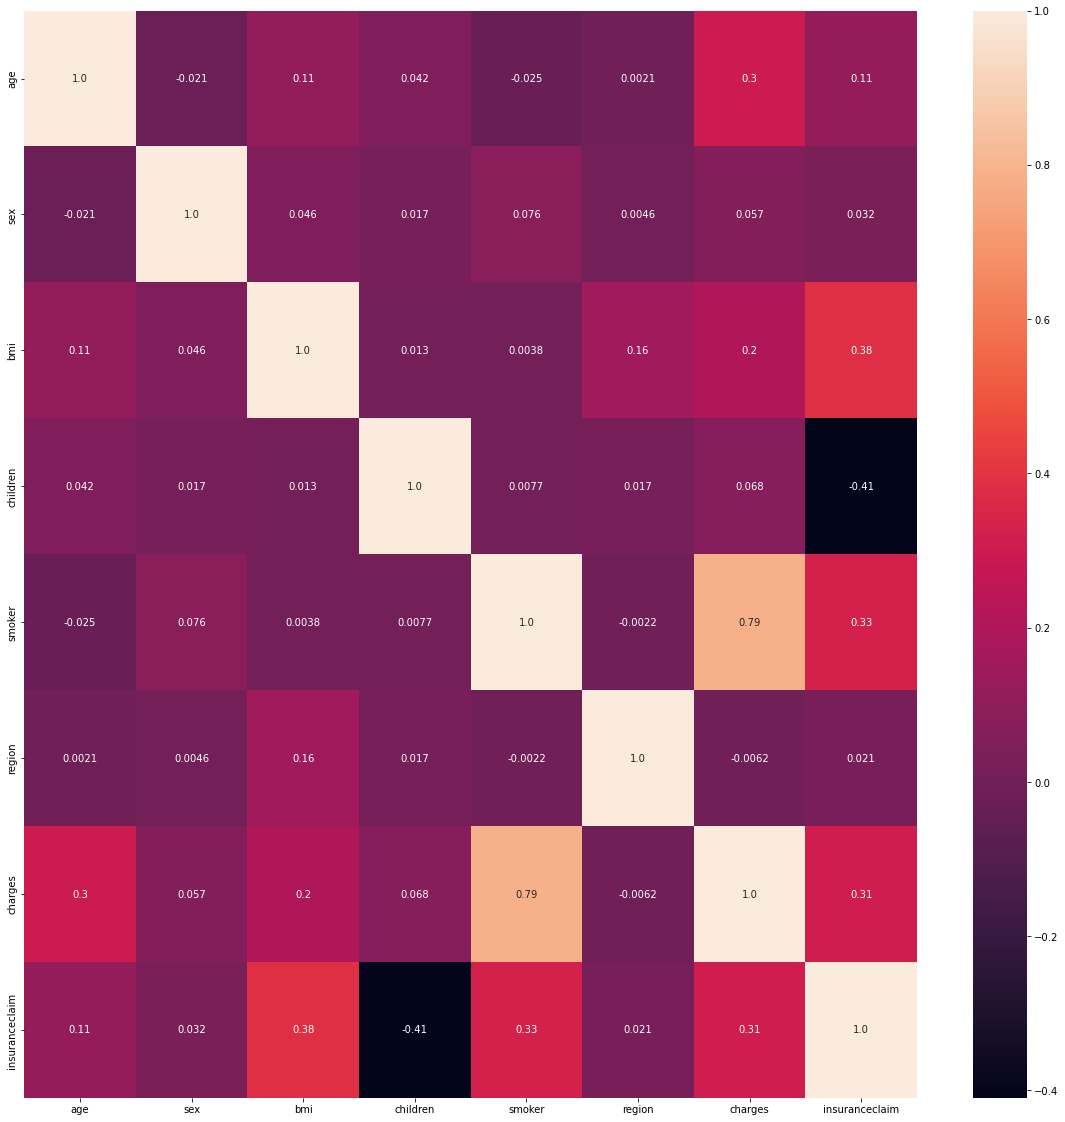

In [11]:
plt.figure(figsize=(20,20))
sns.heatmap(df.corr(), annot=True, fmt=".2")

<AxesSubplot:title={'center':'Class Distribution'}, ylabel='None'>

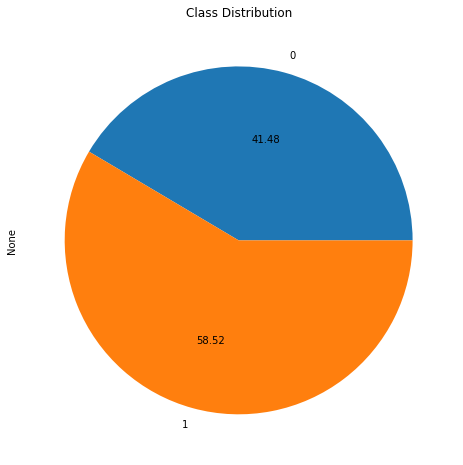

In [12]:
plt.title("Class Distribution")
df.groupby("insuranceclaim").size().plot(kind='pie', autopct='%.2f', figsize=(10,8))

<AxesSubplot:title={'center':'Class Distribution'}, ylabel='None'>

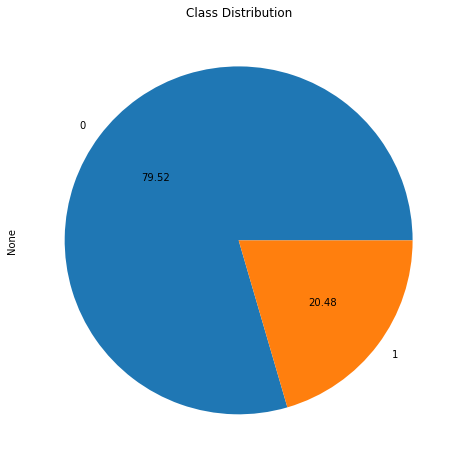

In [13]:
plt.title("Class Distribution")
df.groupby("smoker").size().plot(kind='pie', autopct='%.2f', figsize=(10,8))

# Dataset splitting and preprocessing

In [14]:
X = df.drop('insuranceclaim',axis=1)
y = df[['insuranceclaim']]

In [18]:
from sklearn.model_selection import train_test_split
#X_train, X_test,y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42, stratify = df['insuranceclaim'])
X_train, X_test = train_test_split(df, test_size=0.2, random_state=42, stratify = df['insuranceclaim'])

In [19]:
X_train.shape

(1070, 8)

In [20]:
X_train = train.drop(["insuranceclaim"], axis=1)
y_train = train["insuranceclaim"]
X_test = test.drop(["insuranceclaim"], axis=1) 
y_test = test["insuranceclaim"]

In [21]:
from sklearn.preprocessing import MinMaxScaler

min_max_scaler = MinMaxScaler()
X_train =  min_max_scaler.fit_transform(X_train)
X_test = min_max_scaler.transform(X_test)

In [22]:
X_train

array([[0.34782609, 0.        , 0.31638418, ..., 0.        , 0.66666667,
        0.05591361],
       [0.5       , 1.        , 0.53241862, ..., 1.        , 0.66666667,
        0.66472135],
       [0.        , 1.        , 0.42292171, ..., 1.        , 0.66666667,
        0.56335417],
       ...,
       [0.47826087, 1.        , 0.67984934, ..., 0.        , 0.        ,
        0.09317963],
       [0.65217391, 0.        , 0.46731235, ..., 0.        , 0.66666667,
        0.12159363],
       [0.82608696, 1.        , 0.63599677, ..., 0.        , 1.        ,
        0.16094422]])

## KNN Classifier

In [23]:
import warnings

warnings.filterwarnings('ignore')

Minimum error:- 0.12313432835820895 at K = 3


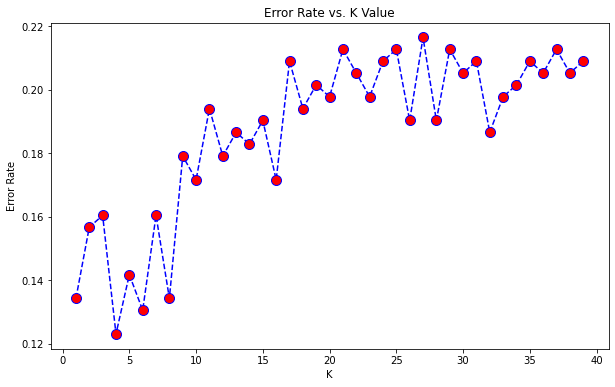

In [24]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
#Train Model and Predict
error_rate = []
for i in range(1,40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', 
         marker='o',markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')
print("Minimum error:-",min(error_rate),"at K =",error_rate.index(min(error_rate)))

Maximum accuracy:- 0.8768656716417911 at K = 3


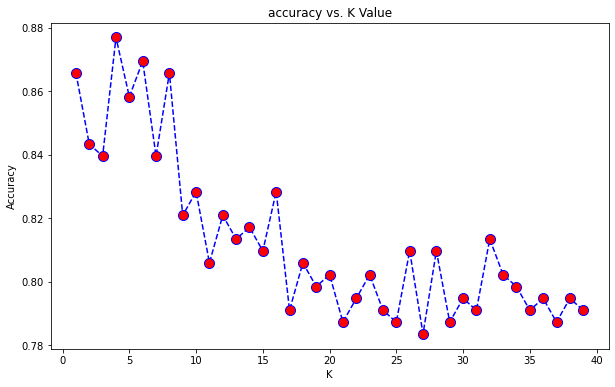

In [25]:
acc = []
from sklearn import metrics
for i in range(1,40):
    neigh = KNeighborsClassifier(n_neighbors = i).fit(X_train,y_train)
    yhat = neigh.predict(X_test)
    acc.append(metrics.accuracy_score(y_test, yhat))
    
plt.figure(figsize=(10,6))
plt.plot(range(1,40),acc,color = 'blue',linestyle='dashed', 
         marker='o',markerfacecolor='red', markersize=10)
plt.title('accuracy vs. K Value')
plt.xlabel('K')
plt.ylabel('Accuracy')
print("Maximum accuracy:-",max(acc),"at K =",acc.index(max(acc)))

## K value hyperparameter tuning with 10-fold cross validation

In [27]:
from sklearn.model_selection import cross_val_score
for i in range(2,21): 
    knn = KNeighborsClassifier(n_neighbors = i)
    scores = cross_val_score(knn, X_train, y_train, cv=10, scoring = 'accuracy')
    print('{}KNN  Average cross_validation score:{}'.format(i,scores.mean()))

2KNN  Average cross_validation score:0.842056074766355
3KNN  Average cross_validation score:0.8457943925233644
4KNN  Average cross_validation score:0.8476635514018691
5KNN  Average cross_validation score:0.8383177570093459
6KNN  Average cross_validation score:0.8542056074766353
7KNN  Average cross_validation score:0.8411214953271028
8KNN  Average cross_validation score:0.8448598130841122
9KNN  Average cross_validation score:0.8355140186915888
10KNN  Average cross_validation score:0.8411214953271028
11KNN  Average cross_validation score:0.8242990654205608
12KNN  Average cross_validation score:0.836448598130841
13KNN  Average cross_validation score:0.8242990654205606
14KNN  Average cross_validation score:0.8289719626168225
15KNN  Average cross_validation score:0.8177570093457943
16KNN  Average cross_validation score:0.8196261682242991
17KNN  Average cross_validation score:0.8186915887850466
18KNN  Average cross_validation score:0.8102803738317756
19KNN  Average cross_validation score:0.8

In [28]:
from sklearn import metrics

knn = KNeighborsClassifier(n_neighbors=6)
knn.fit(X_train,y_train)
y_pred = knn.predict(X_test)
# error_rate.append(np.mean(pred_i != y_test))
confusion_matrix = metrics.confusion_matrix(y_test, y_pred)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])

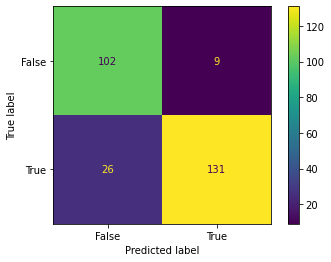

In [29]:
#displaying confusion matrix

import matplotlib.pyplot as plt

cm_display.plot()
plt.show()

In [30]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,classification_report,confusion_matrix

print("Accuracy: ", accuracy_score(y_test, y_pred))
print("Precision:: ", precision_score(y_test, y_pred, average="micro"))
print("Recall:: ", recall_score(y_test, y_pred, average="micro"))
#print("F1_Score:: ", f1_score_rep(y_test, y_pred, average="micro"))

Accuracy:  0.8694029850746269
Precision::  0.8694029850746269
Recall::  0.8694029850746269


## Decision Tree Classifier

In [31]:
from sklearn.tree import DecisionTreeClassifier
DT_model = DecisionTreeClassifier(criterion="gini", random_state=42,max_depth=3, min_samples_leaf=5)   
DT_model.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=3, min_samples_leaf=5, random_state=42)

In [32]:
y_pred = DT_model.predict(X_test)

In [35]:
from sklearn.metrics import accuracy_score,f1_score,classification_report,confusion_matrix

print("Accuracy: ", accuracy_score(y_test, y_pred))
print("Precision:: ", precision_score(y_test, y_pred, average="micro"))
print("Recall:: ", recall_score(y_test, y_pred, average="micro"))
print("F1_Score:: ", f1_score(y_test, y_pred, average="micro"))

Accuracy:  0.8432835820895522
Precision::  0.8432835820895522
Recall::  0.8432835820895522
F1_Score::  0.8432835820895523


In [36]:
target = list(df['insuranceclaim'].unique())
feature_names = list(X.columns)

In [37]:
from sklearn.tree import export_text
r = export_text(DT_model, feature_names=feature_names)
print(r)

|--- bmi <= 0.27
|   |--- smoker <= 0.50
|   |   |--- bmi <= 0.04
|   |   |   |--- class: 1
|   |   |--- bmi >  0.04
|   |   |   |--- class: 0
|   |--- smoker >  0.50
|   |   |--- children <= 0.30
|   |   |   |--- class: 1
|   |   |--- children >  0.30
|   |   |   |--- class: 0
|--- bmi >  0.27
|   |--- children <= 0.10
|   |   |--- class: 1
|   |--- children >  0.10
|   |   |--- smoker <= 0.50
|   |   |   |--- class: 0
|   |   |--- smoker >  0.50
|   |   |   |--- class: 1



## Random Forest

In [38]:
from sklearn.ensemble import RandomForestClassifier

In [39]:
RF_model = RandomForestClassifier(n_jobs=-1, random_state=42)
RF_model.fit(X_train, y_train)

RandomForestClassifier(n_jobs=-1, random_state=42)

In [40]:
y_pred = RF_model.predict(X_test)

In [42]:
print("Accuracy: ", accuracy_score(y_test, y_pred))
print("Precision:: ", precision_score(y_test, y_pred, average="micro"))
print("Recall:: ", recall_score(y_test, y_pred, average="micro"))
print("F1_Score:: ", f1_score(y_test, y_pred, average="micro"))

Accuracy:  0.9552238805970149
Precision::  0.9552238805970149
Recall::  0.9552238805970149
F1_Score::  0.9552238805970149
